                                                   `Ineuron
                                                Internship Project`

                                            `Mushroom_classification`

                                            `Project-by : Tarun Bhardwaj`

`Problem Statement:
The Audubon Society Field Guide to North American Mushrooms contains descriptions
of hypothetical samples corresponding to 23 species of gilled mushrooms in the
Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either
definitely edible, definitely poisonous, or maybe edible but not recommended. This last
category was merged with the toxic category. The Guide asserts unequivocally that
there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it
be" for Poisonous Oak and Ivy.
The main goal is to predict which mushroom is poisonous & which is edible.`

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [15]:
Mushroom_df = pd.read_csv(r"C:\Users\bhard\Downloads\project\mushroom_classification\mushroom\artifact\data_ingestion\2023-06-04-22-53-25\raw_data\mushrooms.csv")

In [16]:
Mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
Mushroom_df.shape

(8124, 23)

In [18]:
Mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Finding missing values

In [19]:
Mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [20]:
M_cols = Mushroom_df.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",Mushroom_df[col].value_counts(),"\n\n")

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

In [21]:

#Data Visualization
#Target plot

#Making a detailed plot for our target to get a clear idea of it's distribution:


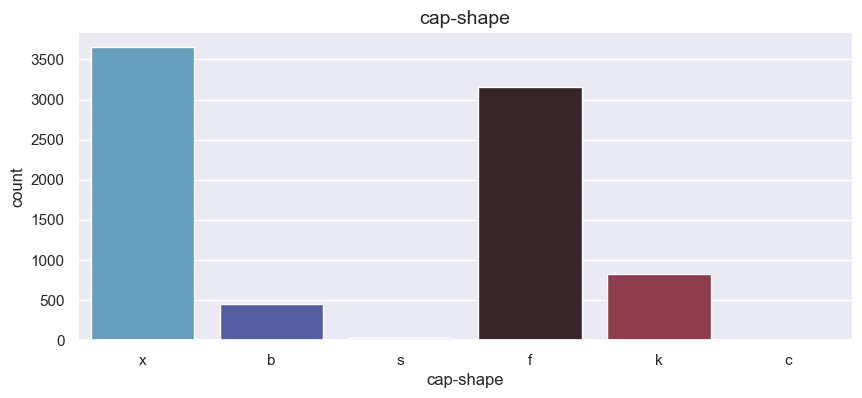

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


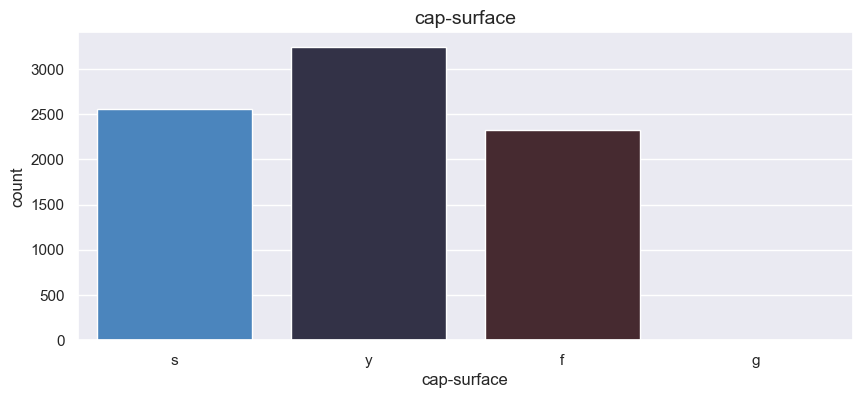

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


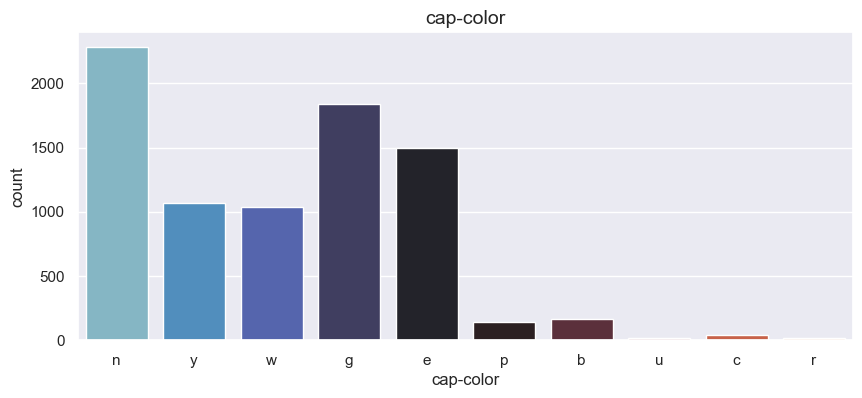

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
r     0.20
u     0.20
Name: cap-color, dtype: float64


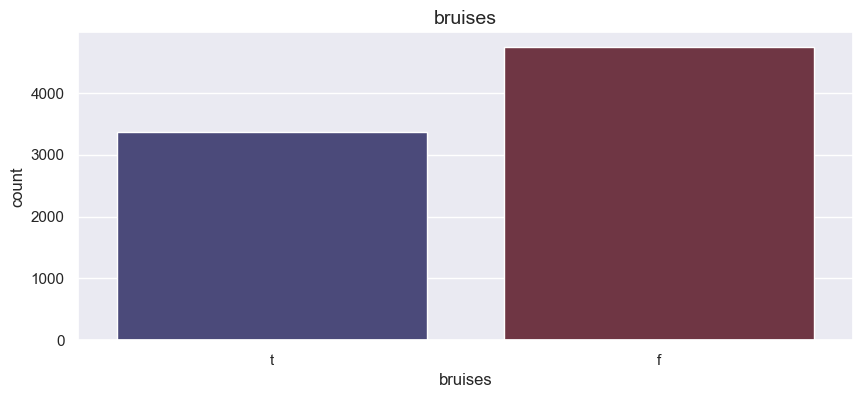

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


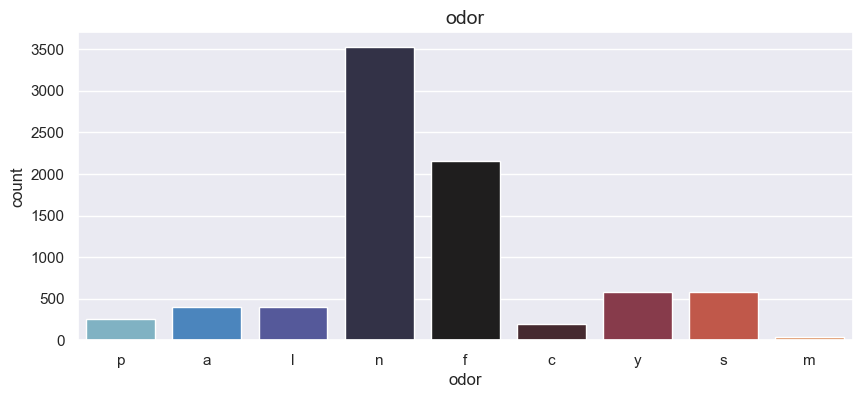

% of total:
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


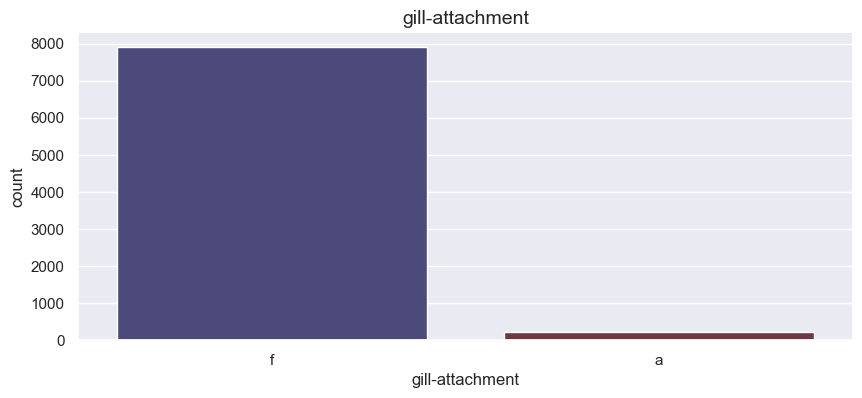

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


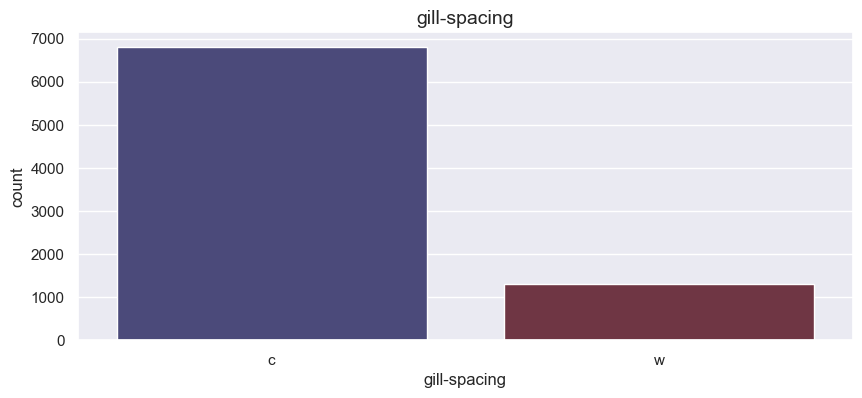

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


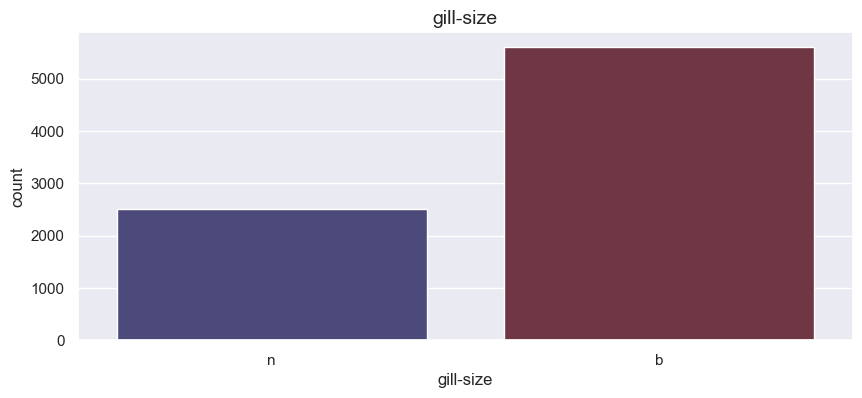

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


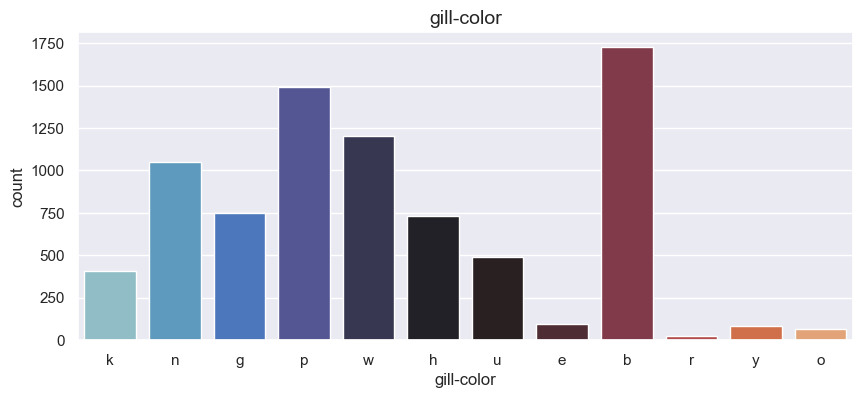

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


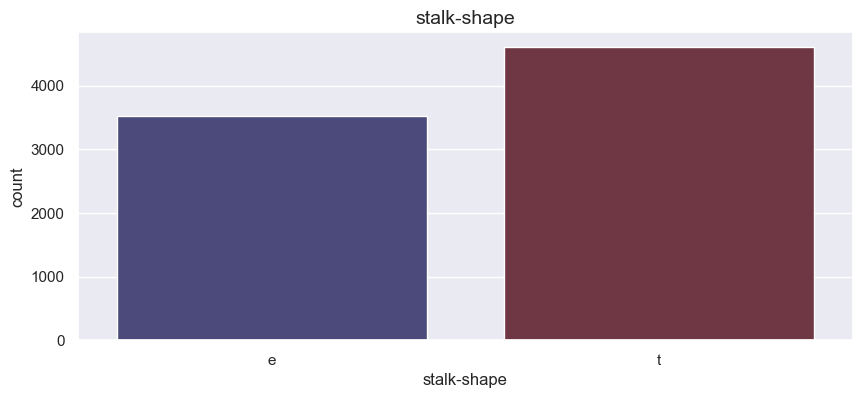

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


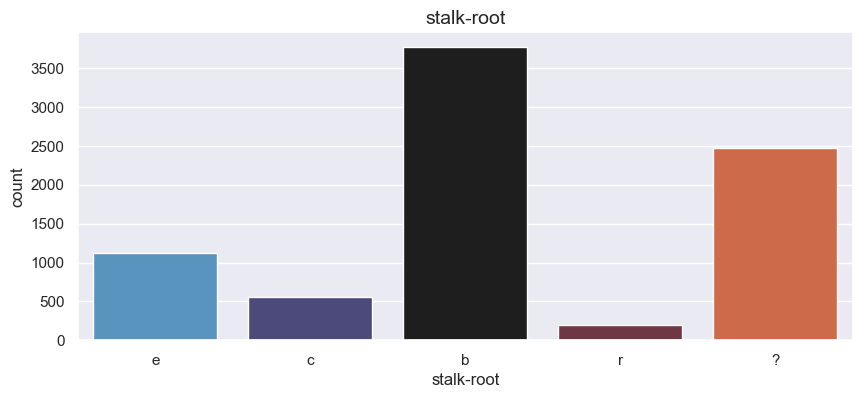

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


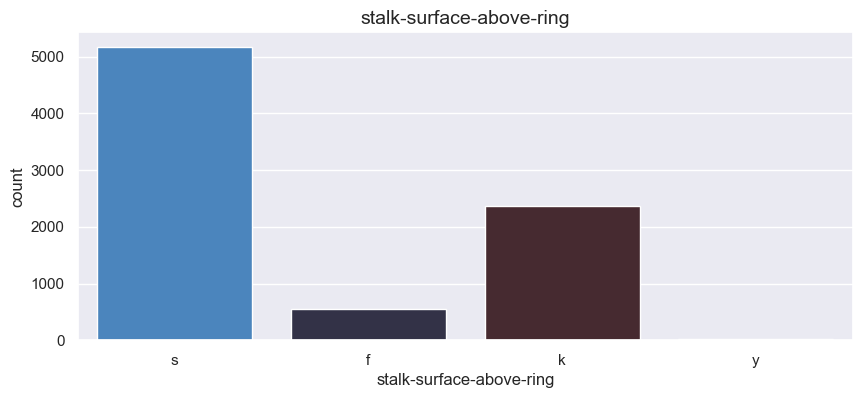

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


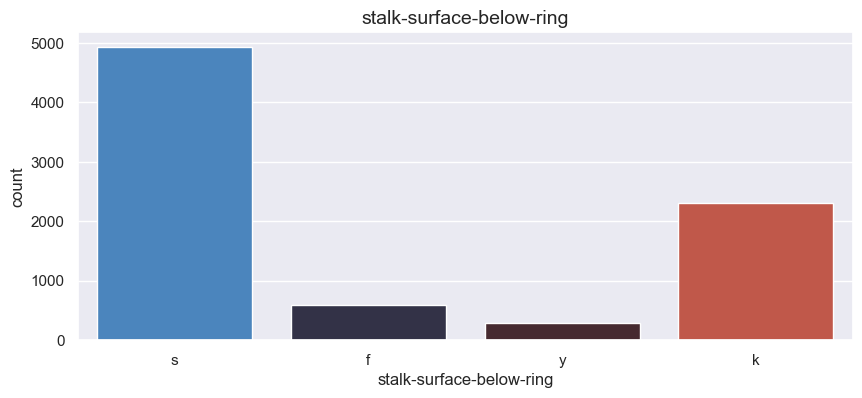

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


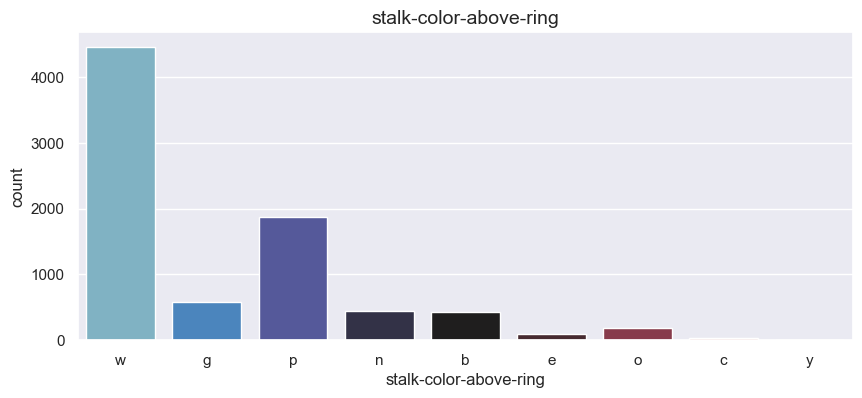

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


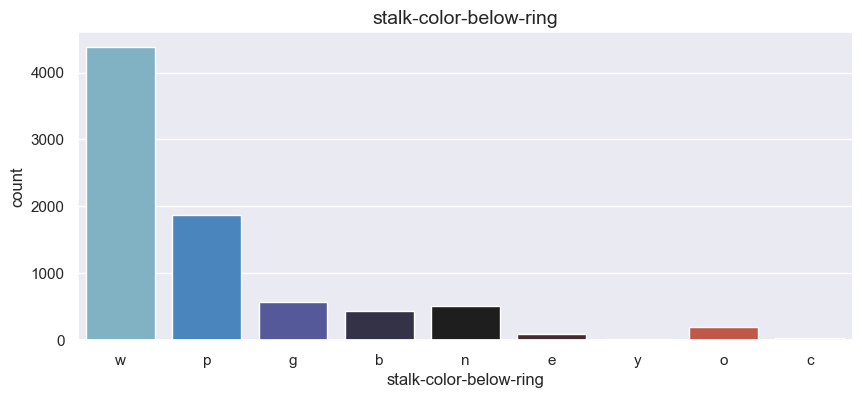

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


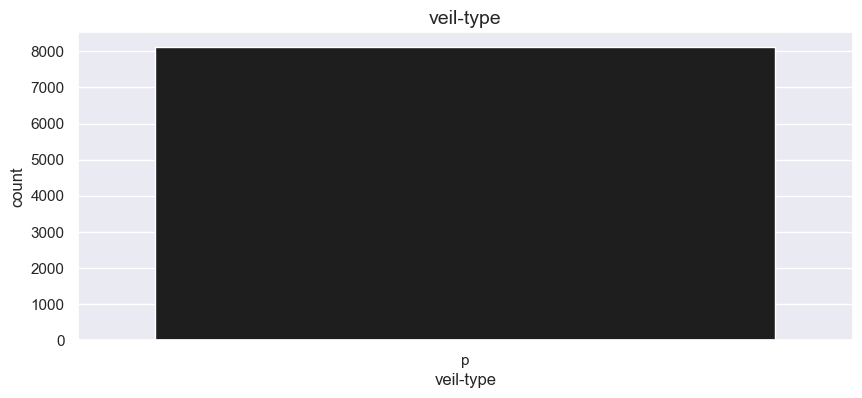

% of total:
p    100.0
Name: veil-type, dtype: float64


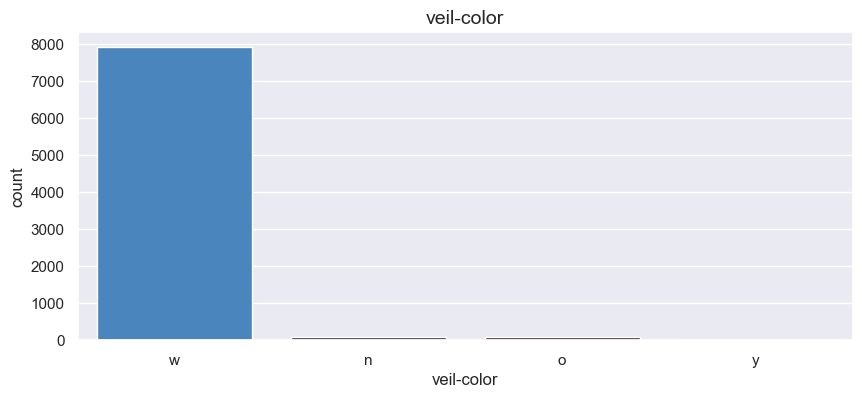

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


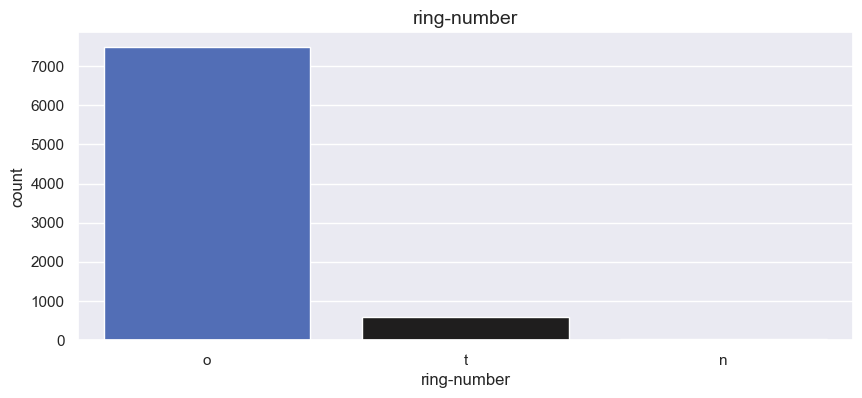

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


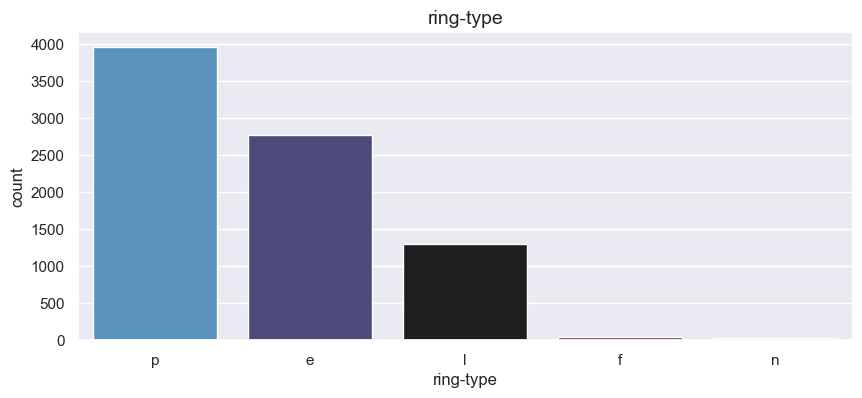

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


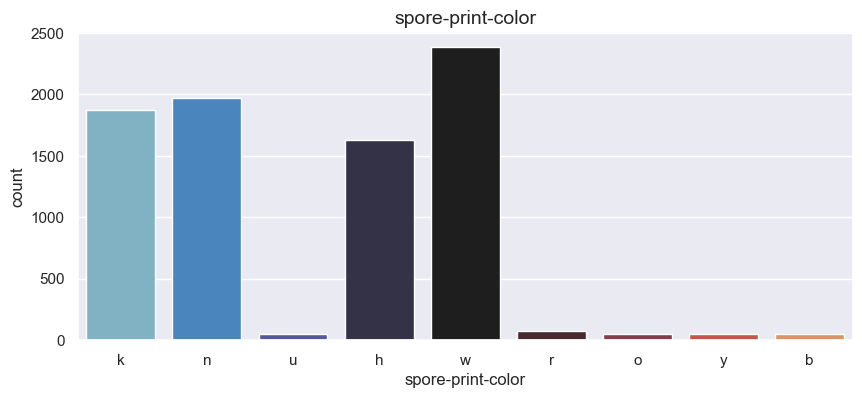

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
y     0.59
o     0.59
u     0.59
b     0.59
Name: spore-print-color, dtype: float64


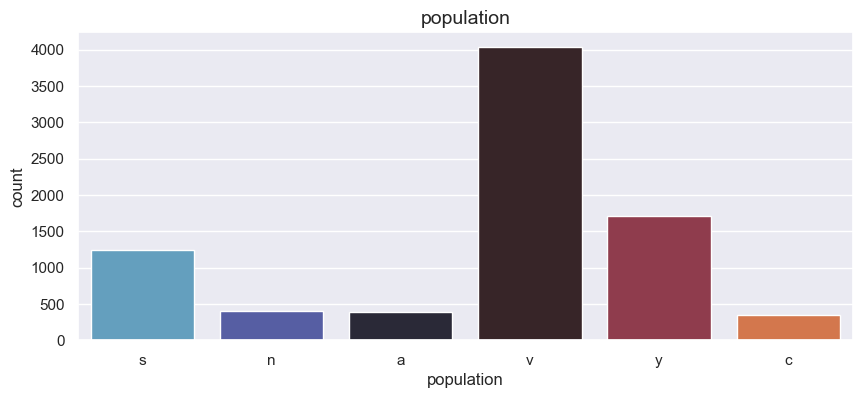

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


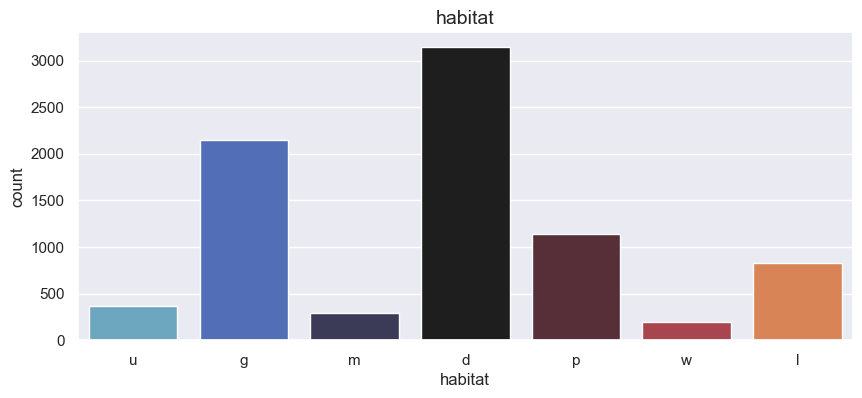

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [22]:

for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=Mushroom_df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((Mushroom_df[col].value_counts()/Mushroom_df.shape[0]),4)*100)

In [23]:
# Unvariate Analisys:

#     cap-shape - Most of the mushrooms in our dataset have a convex (45%) or a flat (38.8%) cap
#     cap-surface - Most frequent cap surface is scaly (39.93%) we have next to non grooves (0.05%)
#     cap-color - Over half of the mushrooms in our dataset have a brown (28.11%) or a gray (22.65%) cap color, we also have 8 other colors that appear less often.
#     bruises - Most of the mushrooms in our dataset are not bruised (58.44%)
#     odor - Most frequent scents (over 70%) are either no smell (43.43%) or a foul smell (26.59%).
#     gill-attachment - Almost our entire data has free gill attachment (about 97.5%) so this column is pretty much usless in our analysis.
#     gill-spacing - More than 85% of the mushrooms in our dataset have a close gill spacing so it has little to no impact in our analysis.
#     gill-size - Most of the mushrooms in our dataset have a broad (69.08%) gil sizes others are narrow.
#     gill-color - Over half of the mushrooms in our dataset have a buff (21.27%),pink (18.37%) or a white (22.65%) gill color, we also have 9 other colors that appear less often.
#     stalk-shape - Most of the mushrooms in our dataset have a tapering (56.72%) others are enlarging.
#     stalk-root - Most frequent stalk roots (over 75%) are either bulbous (46.48%) or silky (30.53%).
#     stalk-surface-above-ring - Most frequent stalk surface above ring (over 90%) are either smooth (63.71%) or silky (29.2%).
#     stalk-surface-below-ring - Most frequent stalk surface below ring (almost 90%) are either smooth (60.76%) or silky (28.36%) next to no difference from stalk-surface-above-ring.
#     stalk-color-above-ring - Over half of the mushrooms in our dataset have a white (54.95%) stalk color, we also have 8 other colors that appear less often.
#     stalk-color-below-ring - Over half of the mushrooms in our dataset have a white (53.96%) stalk color, we also have 8 other colors that appear less often, next to no difference from stalk-color-above-ring.
#     veil-type - All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.
#     veil-color - Almost all of the mushroom's veil color are white (97.54%) so this column is pretty much usless in our analysis.
#     ring-number - Almost all of the mushroom's ring number amount are one (92.17%) so this column is pretty much usless in our analysis.
#     ring-type - Over 98% of the mushrooms in our dataset have a pendant (48.84%),evanescent (34.17%) or a large (15.95%) ring type.
#     spore-print-color - most frequent colors are white (29.39%),brown (24.22%) ,black (23.04%) and chocolate (20.09%), the other colors are insignificant.
#     population - Most frequent populations (over 70%) are either several (49.73%) or solitary (21.07%).
#     habitat - Most frequent habitats (over 65%) are either woods (38.75%) or grasses (26.44%).



c:\Users\bhard\Downloads\project\mushroom_classification\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


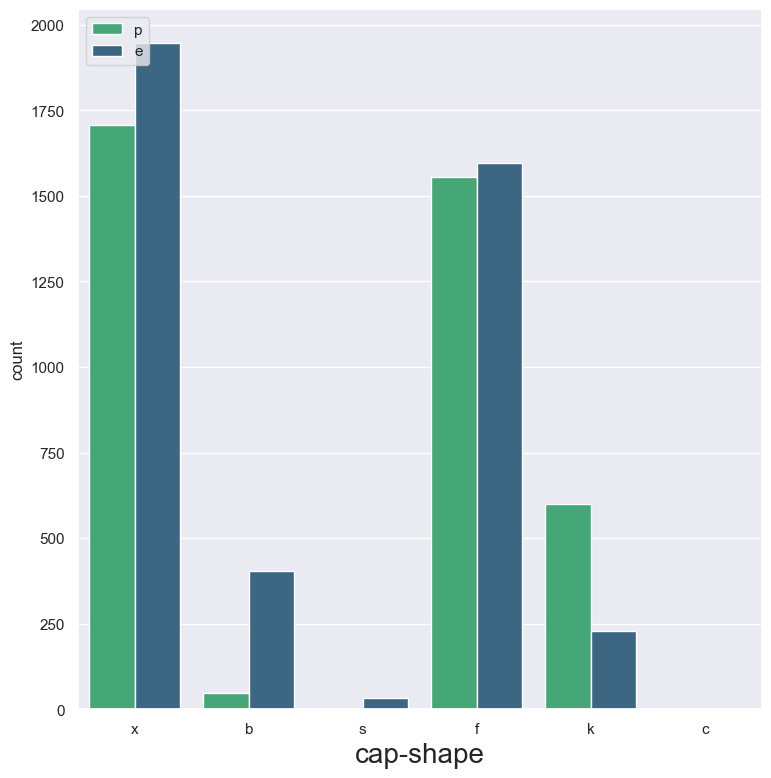

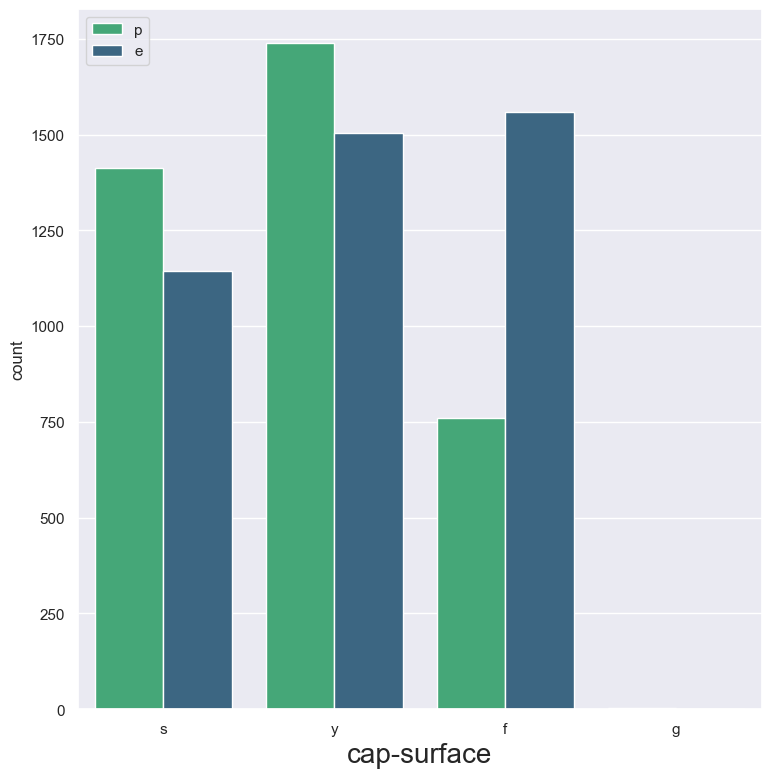

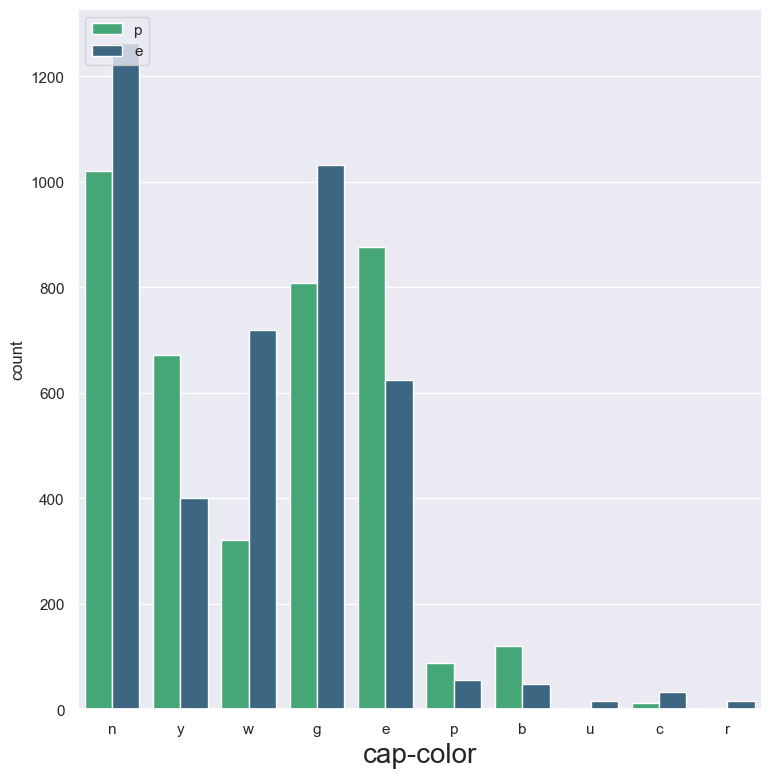

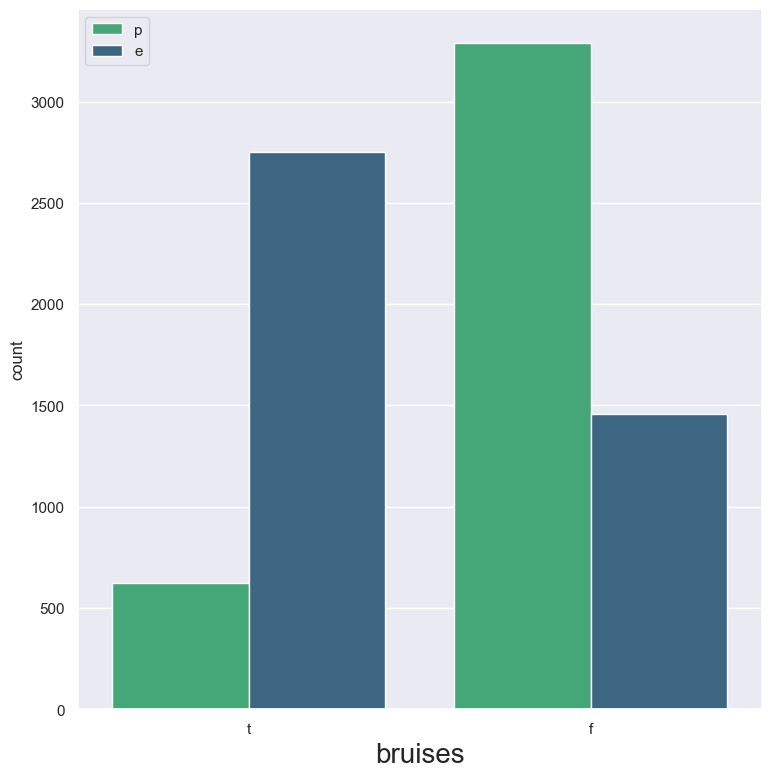

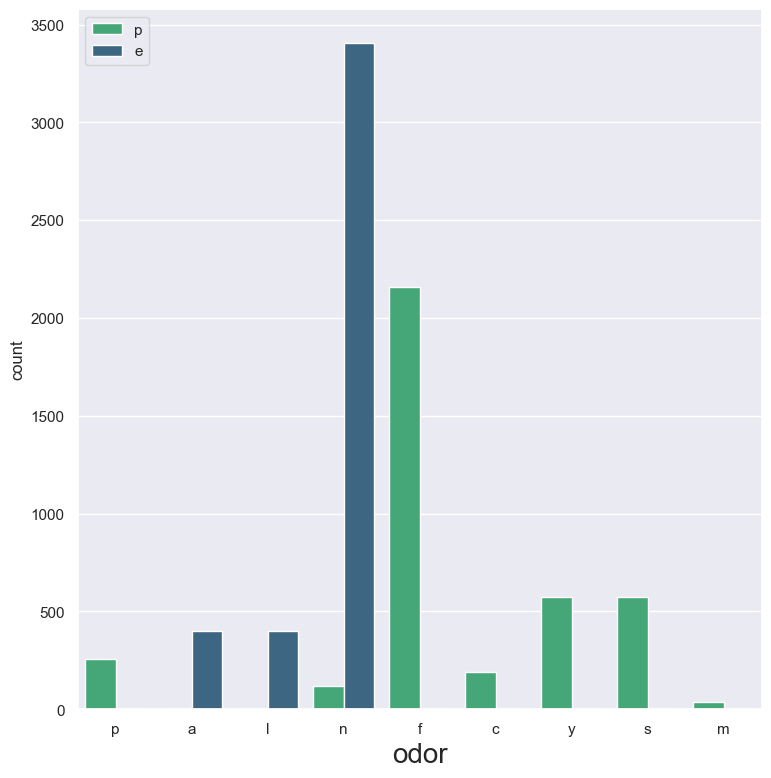

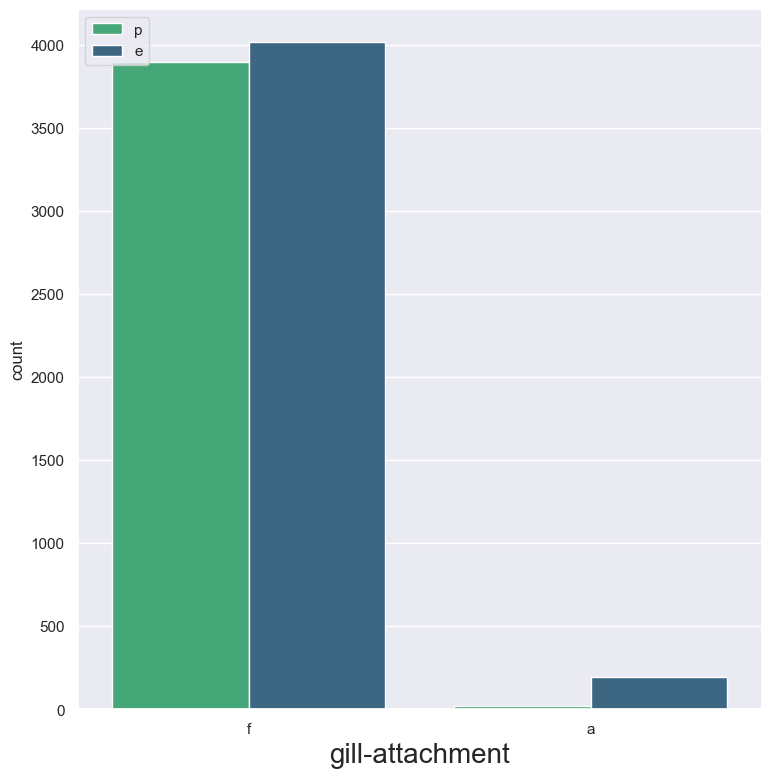

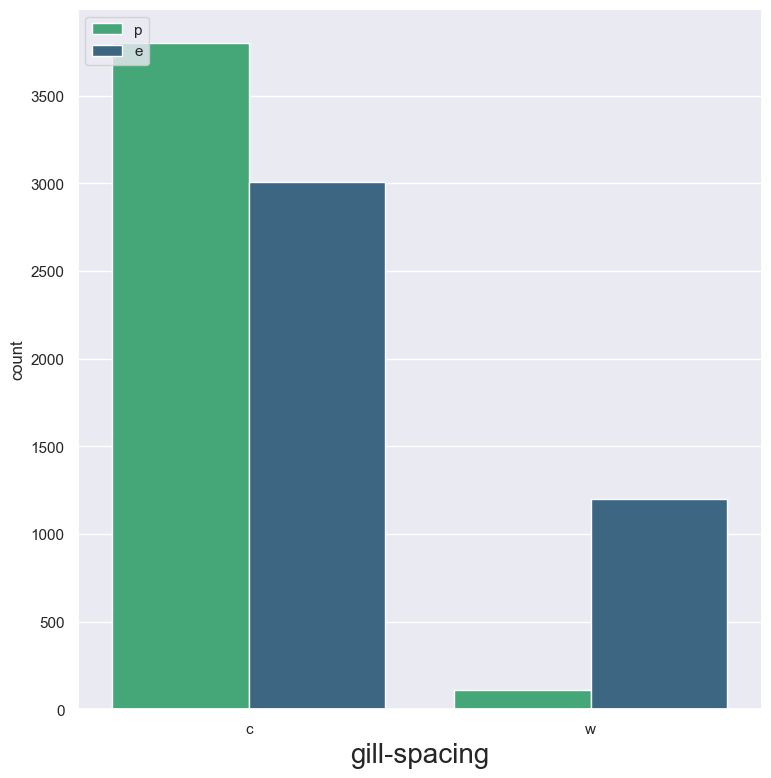

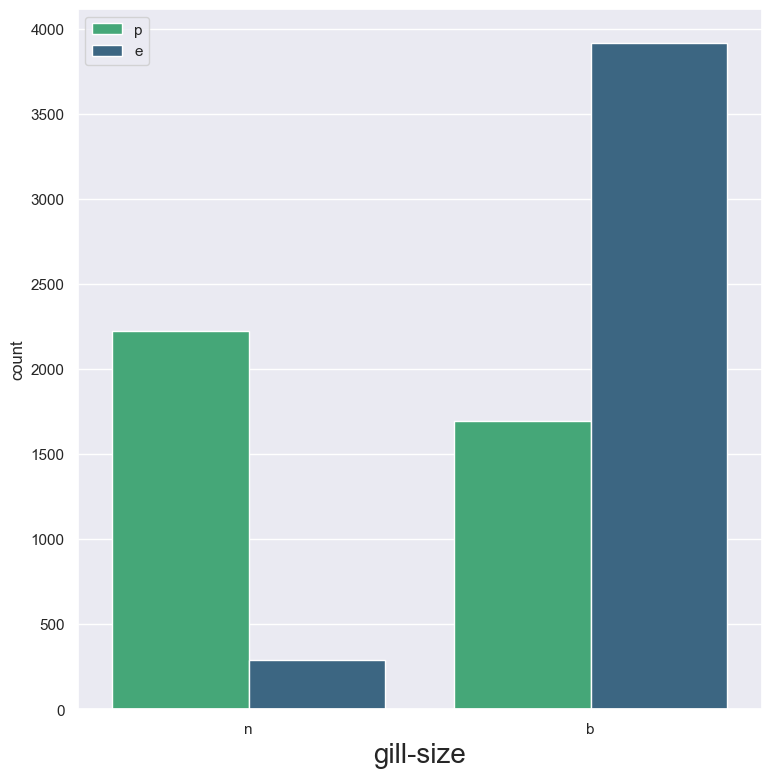

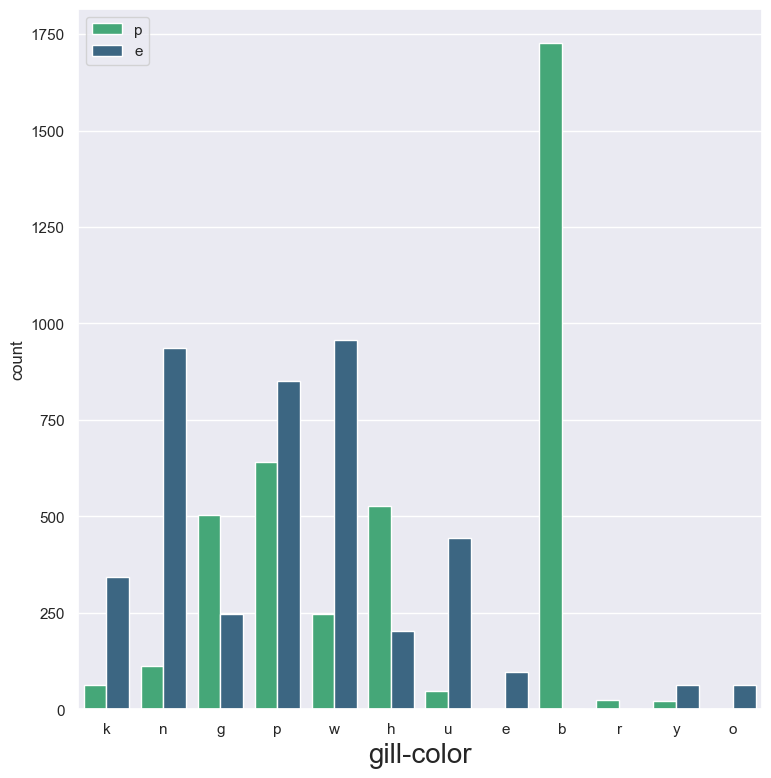

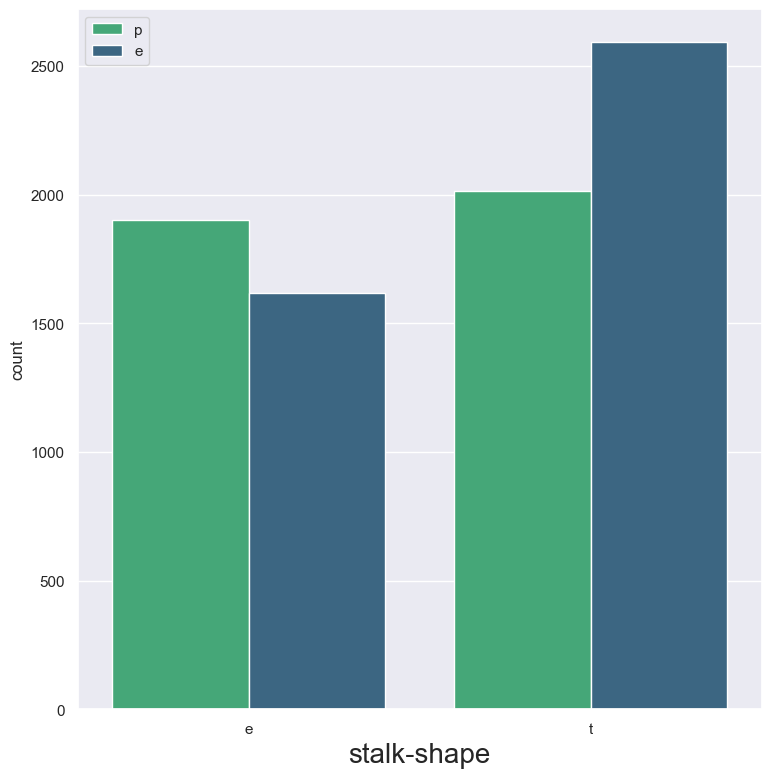

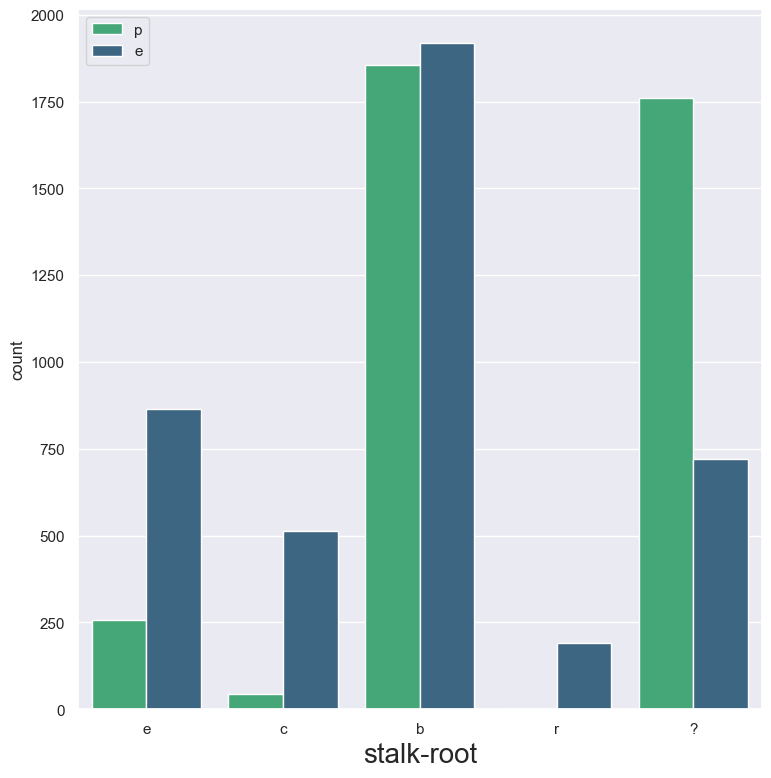

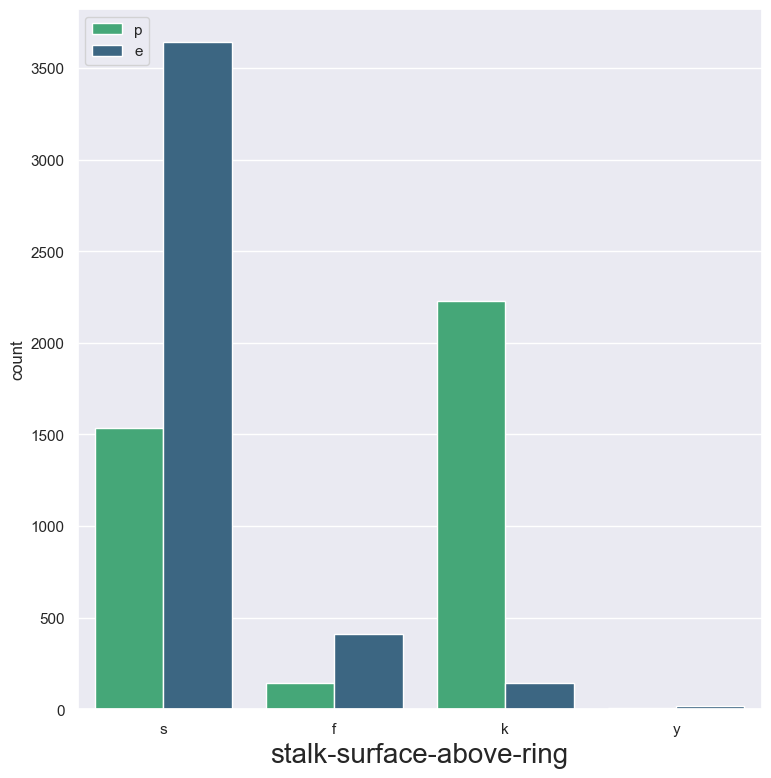

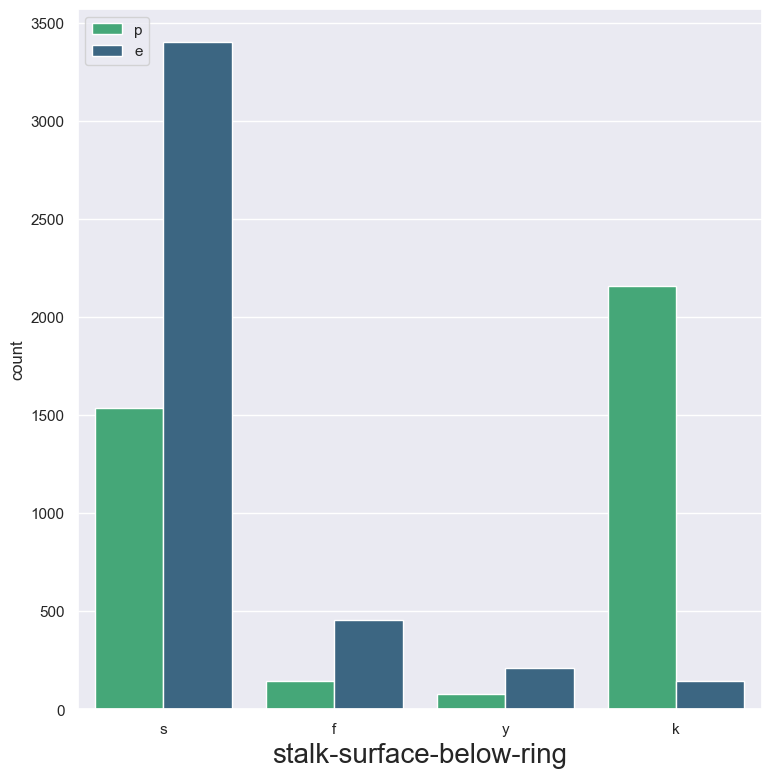

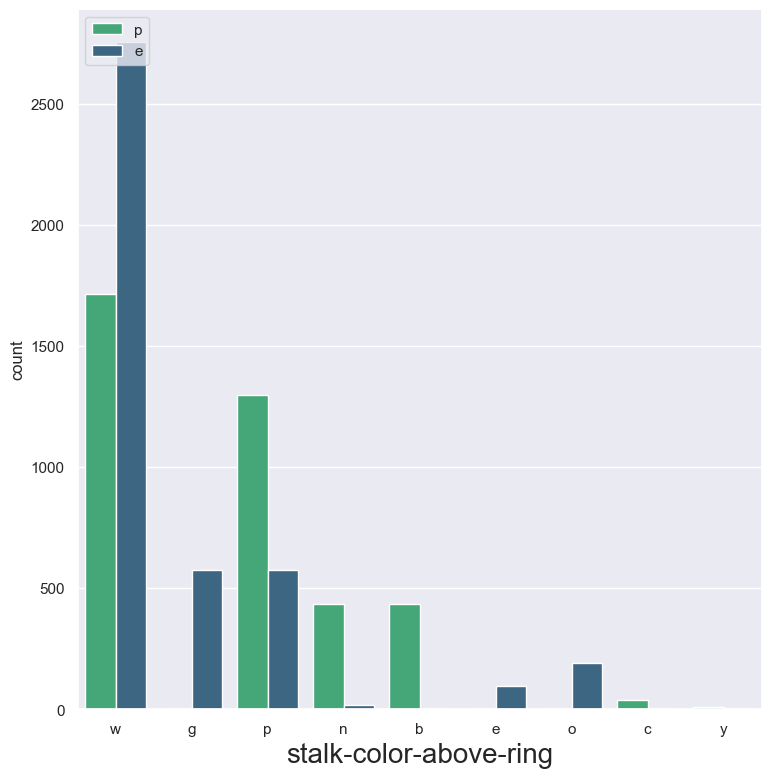

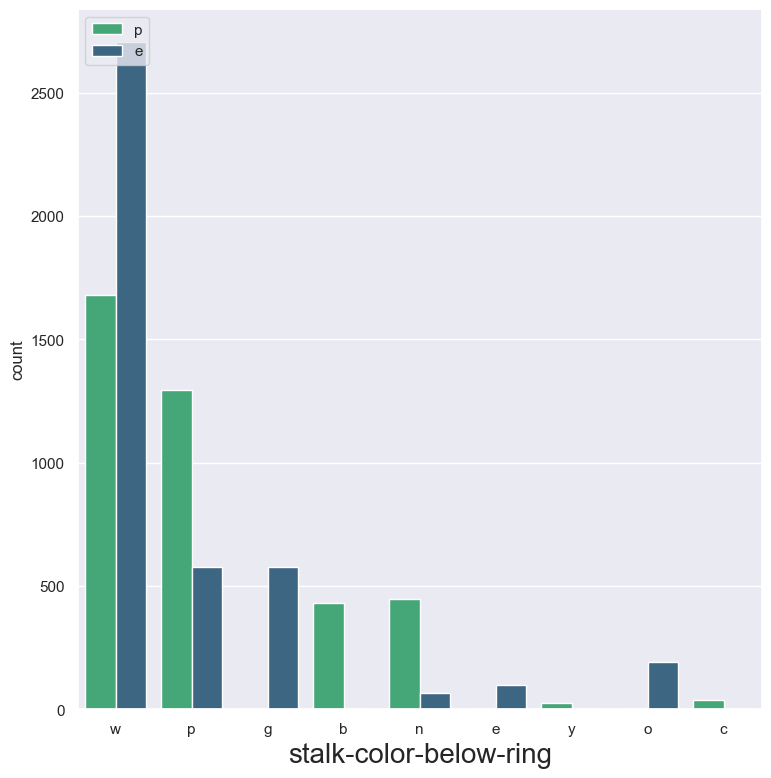

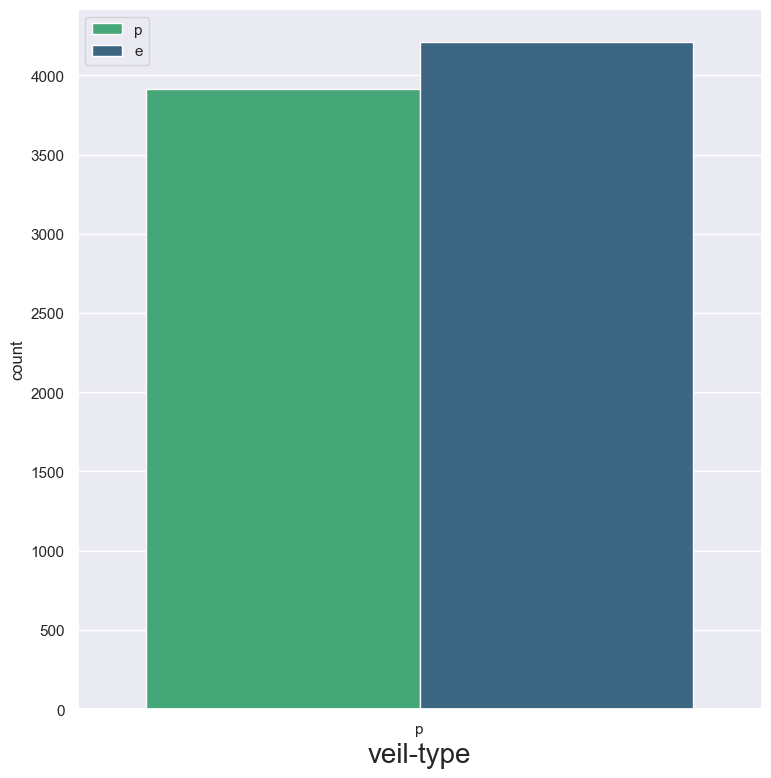

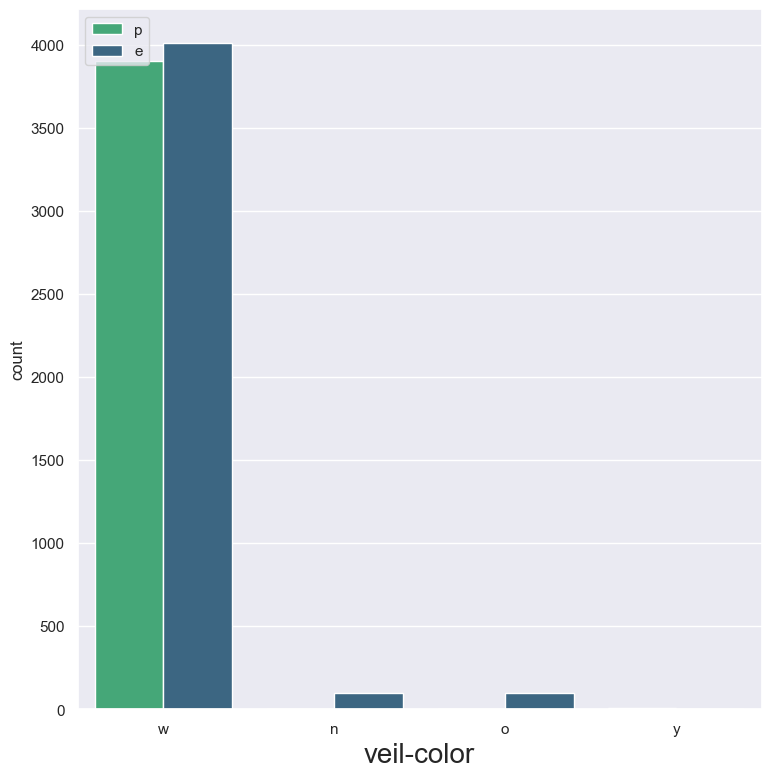

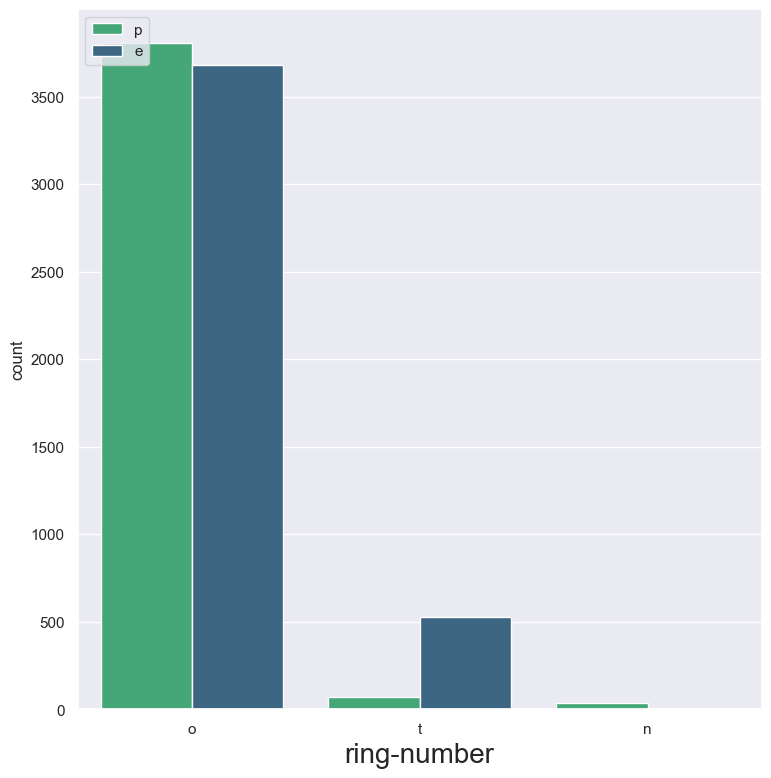

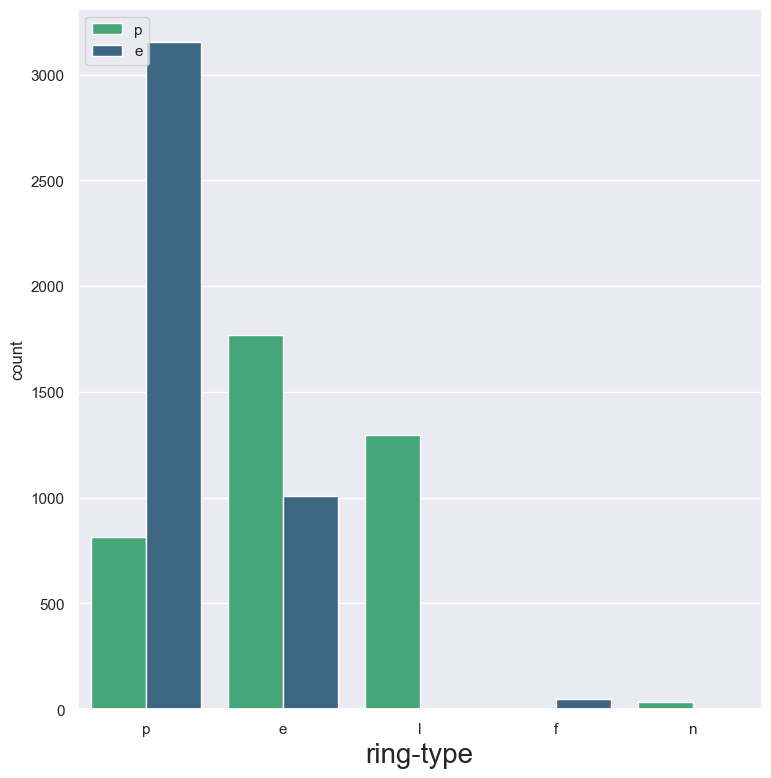

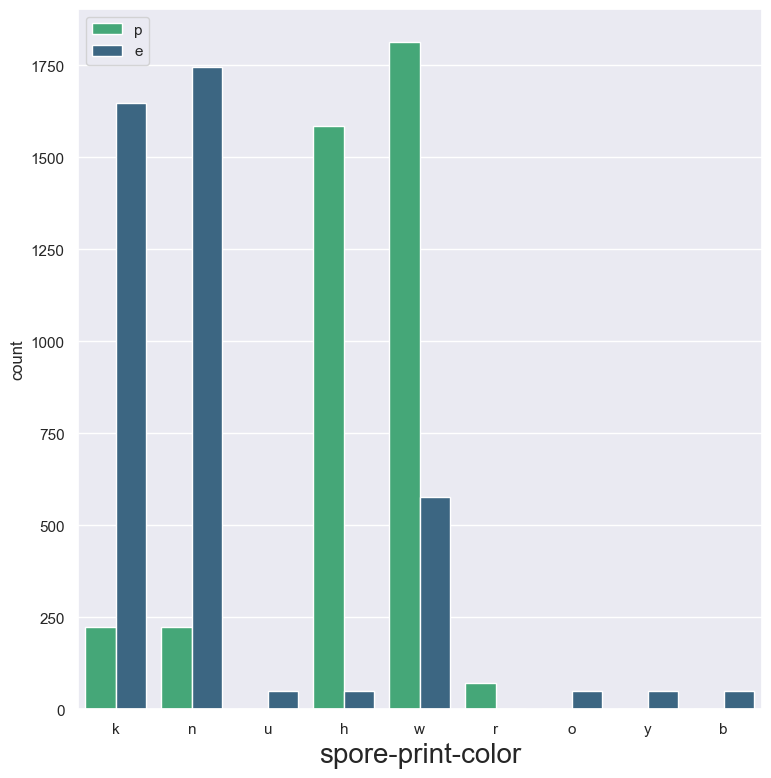

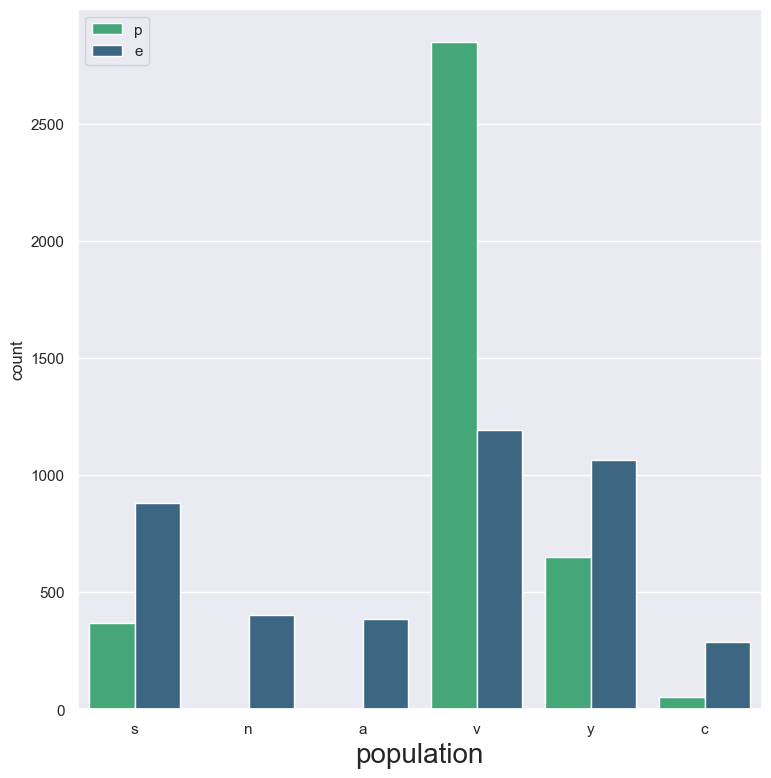

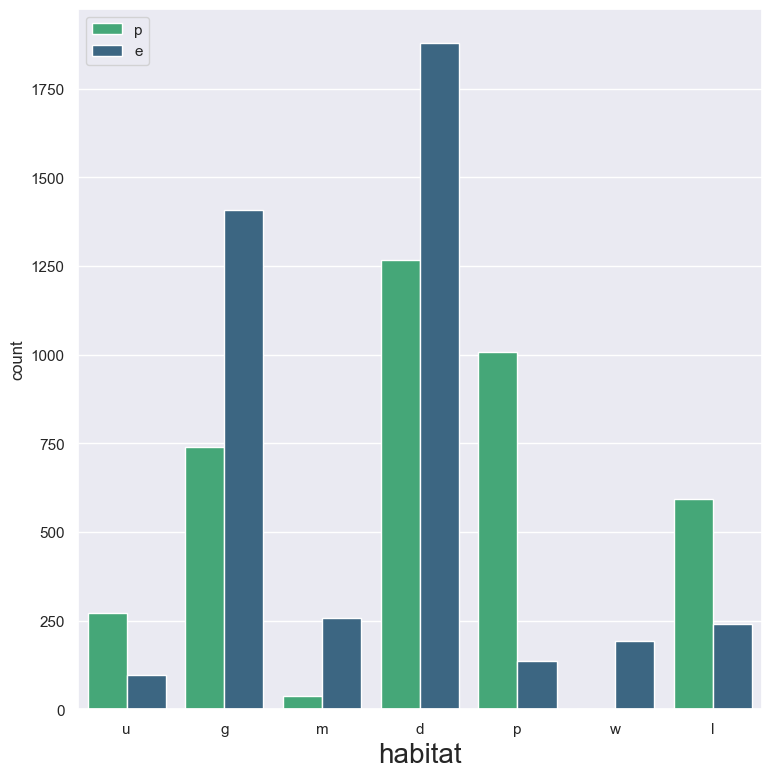

In [24]:
#Multivariate plots

for col in M_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=Mushroom_df ,palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')


In [25]:
[ pd.pivot_table(Mushroom_df, index=[col,"class"], aggfunc = {col:np.count_nonzero}) for col in M_cols[1:]]

[                 cap-shape
 cap-shape class           
 b         e            404
           p             48
 c         p              4
 f         e           1596
           p           1556
 k         e            228
           p            600
 s         e             32
 x         e           1948
           p           1708,
                    cap-surface
 cap-surface class             
 f           e             1560
             p              760
 g           p                4
 s           e             1144
             p             1412
 y           e             1504
             p             1740,
                  cap-color
 cap-color class           
 b         e             48
           p            120
 c         e             32
           p             12
 e         e            624
           p            876
 g         e           1032
           p            808
 n         e           1264
           p           1020
 p         e             56
          

In [26]:
# Multivariate Analisys:

#     cap-shape - Most of the knobbed mushrooms in our dataset are poisonous.
#     cap-surface - Most fibrous cap surface are edible.
#     cap-color - Most white cap colored mushrooms are edible while most yellow cap colored mushrooms are poisonous.
#     bruises - Bruised mushrooms are usually edible while unbruised ones are usually the oppisite.
#     odor - No smell mushrooms are mostly edible by a wide margin while all foul smell mushrooms are poisonous.
#     gill-attachment - The attached gills are almost always edible.
#     gill-spacing - The crowded gills are almost always edible.
#     gill-size - The narrow gill sized mushrooms are almost always poisonous.
#     gill-color - The buff gill colored mushrooms are always poisonous.
#     stalk-shape - insignificant difference betwwen each value in terms of poisonous or edible.
#     stalk-root - Mushrooms with missing data of stalk roots are usually poisonous.
#     stalk-surface-above-ring - The silky mushrooms are usually poisonous, smooth are usually edible.
#     stalk-surface-below-ring - About the same as stalk-surface-above-ring.
#     stalk-color-above-ring - The white stalk colored mushrooms are usually edible, pink ones are mostly poisonous.
#     stalk-color-below-ring - About the same as stalk-color-above-ring.
#     veil-type - All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.
#     veil-color - Almost all of the mushroom's veil color are white (97.54%) so this column is pretty much usless in our analysis.
#     ring-number - Almost all of the mushroom's ring number amount are one (92.17%) so this column is pretty much usless in our analysis.
#     ring-type - The pendant ring typed mushrooms are mostly edible,evanescent are mostly poisonous and large ring types are all poisonous.
#     spore-print-color - The brown and black ones are almost entirely edible while white and chocolate (20.09%) are mostly poisonous.
#     population - Mushrooms with a several population are mostly poisonous.
#     habitat - The woods or grasses grown mushrooms are mostly edible.


In [29]:
# Feature Engineering

# From the analysis above the following columns are not needed so we will drop them: 
# gill-attachment, stalk-shape, stalk-surface-below-ring, stalk-color-below-ring, veil-type, veil-color, ring-number. 
# so now we will create our feetures varable x excluding the mentioned columns:

In [31]:
Del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number'] 
X =Mushroom_df.copy()
for col in Del_cols:
    X = X.drop(col, axis = 1)
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
Mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [34]:
for i in Mushroom_df.columns:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [35]:
for column in Mushroom_df.columns:
    count = Mushroom_df[column][Mushroom_df[column]=='?'].count()
    if count!=0:
        print(column,Mushroom_df[column][Mushroom_df[column]=='?'].count())


stalk-root 2480


In [36]:
import os
os.chdir(r"c:\\Users\\bhard\\Downloads\\project\\mushroom_classification")

In [37]:
from mushroom.util.util import load_data, add_quotes_to_values,replace_invalid_values_with_null

In [38]:
train_data = load_data(r"C:\Users\bhard\Downloads\project\mushroom_classification\mushroom\artifact\data_ingestion\2023-05-14-22-39-40\ingested_data\train\mushrooms.csv",r"C:\Users\bhard\Downloads\project\mushroom_classification\config\schema.yaml")
test_data = load_data(r"C:\Users\bhard\Downloads\project\mushroom_classification\mushroom\artifact\data_ingestion\2023-05-14-22-39-40\ingested_data\test\mushrooms.csv",r"C:\Users\bhard\Downloads\project\mushroom_classification\config\schema.yaml")

In [41]:
train_data = add_quotes_to_values(train_data)
test_data = add_quotes_to_values(test_data)

In [42]:
train_df = replace_invalid_values_with_null(train_data)
test_df = replace_invalid_values_with_null(test_data)

In [43]:
train_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,k,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
1,p,x,s,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
2,p,f,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
3,e,f,f,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,v,d
4,e,b,y,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,p,x,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
6495,e,k,y,e,t,n,f,c,b,w,...,s,w,e,p,w,t,e,w,c,w
6496,e,f,y,n,t,l,f,c,b,w,...,y,w,w,p,w,o,p,n,y,p
6497,p,k,s,e,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,p


In [44]:
test_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,f,f,n,f,n,f,w,b,h,...,f,w,w,p,w,o,e,n,s,g
1,p,f,s,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
2,p,x,y,n,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,l
3,e,f,y,g,t,n,f,c,b,n,...,s,g,p,p,w,o,p,n,y,d
4,p,f,s,e,f,s,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,p,k,s,e,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
1621,e,f,s,n,f,n,f,w,b,h,...,s,w,w,p,w,o,e,k,a,g
1622,p,x,y,n,f,f,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p
1623,p,k,y,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p


In [45]:
input_feature_train_df = train_df.drop(columns=['class'],axis=1)
target_feature_train_df = train_df['class']

input_feature_test_df = test_df.drop(columns=['class'],axis=1)
target_feature_test_df = test_df['class']

In [46]:
input_feature_train_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,k,s,e,f,s,f,c,n,b,t,...,k,p,w,p,w,o,e,w,v,d
1,x,s,n,f,f,f,c,n,b,t,...,s,w,w,p,w,o,e,w,v,p
2,f,y,e,f,y,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,l
3,f,f,n,t,n,f,c,b,u,t,...,s,g,p,p,w,o,p,n,v,d
4,b,y,y,t,l,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,x,y,n,f,f,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,p
6495,k,y,e,t,n,f,c,b,w,e,...,s,w,e,p,w,t,e,w,c,w
6496,f,y,n,t,l,f,c,b,w,e,...,y,w,w,p,w,o,p,n,y,p
6497,k,s,e,f,f,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,p


In [47]:
target_feature_train_df

0       p
1       p
2       p
3       e
4       e
       ..
6494    p
6495    e
6496    e
6497    p
6498    e
Name: class, Length: 6499, dtype: object

In [48]:
input_feature_test_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,f,n,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
1,f,s,e,f,y,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l
2,x,y,n,f,f,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,l
3,f,y,g,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,n,y,d
4,f,s,e,f,s,f,c,n,b,t,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,k,s,e,f,f,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,p
1621,f,s,n,f,n,f,w,b,h,t,...,s,w,w,p,w,o,e,k,a,g
1622,x,y,n,f,f,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p
1623,k,y,n,f,y,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p


In [49]:
target_feature_test_df

0       e
1       p
2       p
3       e
4       p
       ..
1620    p
1621    e
1622    p
1623    p
1624    p
Name: class, Length: 1625, dtype: object

In [50]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [51]:
categorical_columns=[ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [52]:
categorical_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [38]:
def get_data_transformer_object():
    preprocessing = OneHotEncoder(handle_unknown="ignore")
    return preprocessing

In [41]:
preprocessing_obj = get_data_transformer_object()